# 线性回归 (Linear Regression)

## 目标
- 理解线性回归的基本原理
- 从零实现线性回归
- 使用Scikit-learn进行线性回归
- 可视化回归结果
- 评估模型性能

---

## 1. 理论简介

### 什么是线性回归？
线性回归是一种预测连续值的监督学习算法。它假设特征和目标之间存在线性关系。

### 数学公式
对于单变量线性回归：
$$y = wx + b$$

对于多变量线性回归：
$$y = w_1x_1 + w_2x_2 + ... + w_nx_n + b$$

矩阵形式：
$$y = X \cdot w + b$$

### 损失函数（均方误差 MSE）
$$L = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2$$

### 优化方法
1. **正规方程（Normal Equation）**：直接求解最优参数
   $$w = (X^TX)^{-1}X^Ty$$

2. **梯度下降（Gradient Descent）**：迭代优化
   $$w = w - \alpha \frac{\partial L}{\partial w}$$

---

## 2. 导入必要的库

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 设置随机种子
np.random.seed(42)

# 设置绘图风格
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')
plt.rcParams['font.sans-serif'] = [
        'Arial Unicode MS',  # macOS通用
        'PingFang SC',       # macOS系统字体
        'STHeiti',           # 华文黑体
        'Heiti TC',          # 黑体-繁
        'SimHei',            # 黑体
    ]
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

print('✓ 所有库导入成功')

✓ 所有库导入成功


## 3. 生成模拟数据

我们先用简单的一维数据来理解线性回归

In [2]:
# 生成线性数据
n_samples = 100
X = 2 * np.random.rand(n_samples, 1)  # 100个样本，1个特征
y = 4 + 3 * X + np.random.randn(n_samples, 1)  # y = 3x + 4 + 噪声

print(f'数据形状: X={X.shape}, y={y.shape}')
print(f'真实参数: w=3, b=4')

数据形状: X=(100, 1), y=(100, 1)
真实参数: w=3, b=4


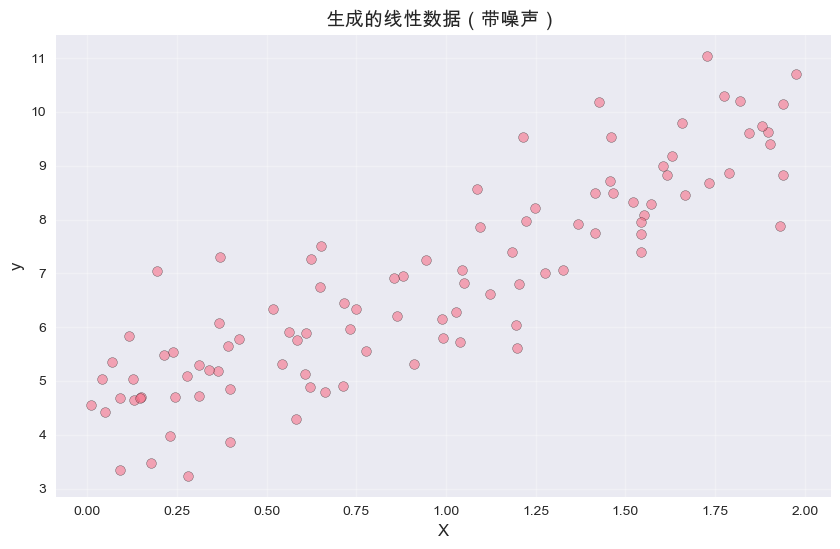

In [3]:
# 可视化数据
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.6, edgecolors='k')
plt.xlabel('X', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('生成的线性数据（带噪声）', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

## 4. 从零实现线性回归

### 方法1：使用正规方程

In [4]:
class LinearRegressionNormal:
    """使用正规方程实现的线性回归"""
    
    def __init__(self):
        self.w = None
        self.b = None
    
    def fit(self, X, y):
        """
        训练模型
        使用正规方程: w = (X^T X)^(-1) X^T y
        """
        # 添加偏置项（在X前面加一列1）
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        
        # 正规方程
        theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
        
        self.b = theta[0, 0]
        self.w = theta[1:]
        
        return self
    
    def predict(self, X):
        """预测"""
        return X @ self.w + self.b

# 训练模型
model_normal = LinearRegressionNormal()
model_normal.fit(X, y)

print(f'学到的参数:')
print(f'  w = {model_normal.w[0, 0]:.4f} (真实值: 3.0)')
print(f'  b = {model_normal.b:.4f} (真实值: 4.0)')

学到的参数:
  w = 2.7701 (真实值: 3.0)
  b = 4.2151 (真实值: 4.0)


### 方法2：使用梯度下降

In [5]:
class LinearRegressionGD:
    """使用梯度下降实现的线性回归"""
    
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.lr = learning_rate
        self.n_iterations = n_iterations
        self.w = None
        self.b = None
        self.losses = []
    
    def fit(self, X, y):
        """训练模型"""
        n_samples, n_features = X.shape
        
        # 初始化参数
        self.w = np.zeros((n_features, 1))
        self.b = 0
        
        # 梯度下降
        for i in range(self.n_iterations):
            # 前向传播
            y_pred = X @ self.w + self.b
            
            # 计算损失
            loss = np.mean((y - y_pred) ** 2)
            self.losses.append(loss)
            
            # 计算梯度
            dw = -(2 / n_samples) * X.T @ (y - y_pred)
            db = -(2 / n_samples) * np.sum(y - y_pred)
            
            # 更新参数
            self.w -= self.lr * dw
            self.b -= self.lr * db
            
            # 每100次迭代打印一次
            if (i + 1) % 100 == 0:
                print(f'Iteration {i+1}/{self.n_iterations}, Loss: {loss:.4f}')
        
        return self
    
    def predict(self, X):
        """预测"""
        return X @ self.w + self.b

# 训练模型
model_gd = LinearRegressionGD(learning_rate=0.1, n_iterations=1000)
model_gd.fit(X, y)

print(f'\n学到的参数:')
print(f'  w = {model_gd.w[0, 0]:.4f} (真实值: 3.0)')
print(f'  b = {model_gd.b:.4f} (真实值: 4.0)')

Iteration 100/1000, Loss: 0.8069
Iteration 200/1000, Loss: 0.8066
Iteration 300/1000, Loss: 0.8066
Iteration 400/1000, Loss: 0.8066
Iteration 500/1000, Loss: 0.8066
Iteration 600/1000, Loss: 0.8066
Iteration 700/1000, Loss: 0.8066
Iteration 800/1000, Loss: 0.8066
Iteration 900/1000, Loss: 0.8066
Iteration 1000/1000, Loss: 0.8066

学到的参数:
  w = 2.7701 (真实值: 3.0)
  b = 4.2151 (真实值: 4.0)


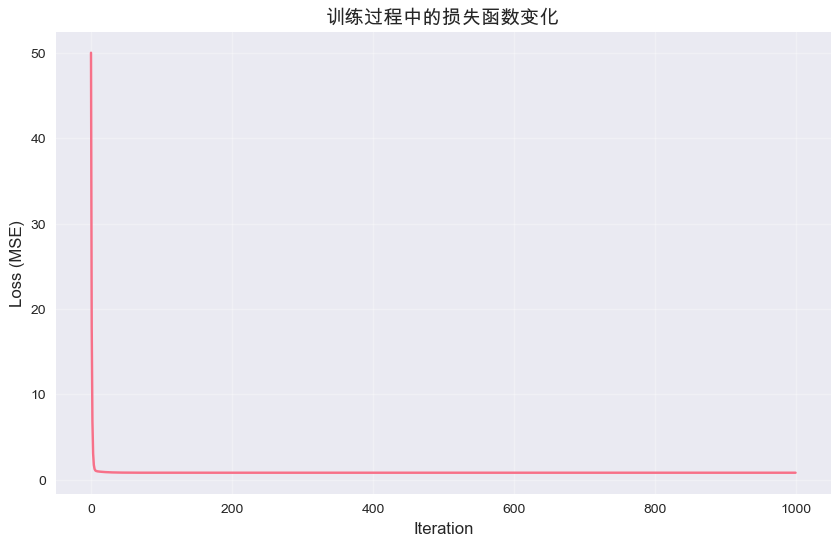

In [6]:
# 可视化损失函数下降过程
plt.figure(figsize=(10, 6))
plt.plot(model_gd.losses)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Loss (MSE)', fontsize=12)
plt.title('训练过程中的损失函数变化', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

## 5. 使用Scikit-learn

In [7]:
# 使用sklearn的线性回归
model_sklearn = LinearRegression()
model_sklearn.fit(X, y)

print(f'sklearn学到的参数:')
print(f'  w = {model_sklearn.coef_[0, 0]:.4f}')
print(f'  b = {model_sklearn.intercept_[0]:.4f}')

sklearn学到的参数:
  w = 2.7701
  b = 4.2151


## 6. 可视化预测结果

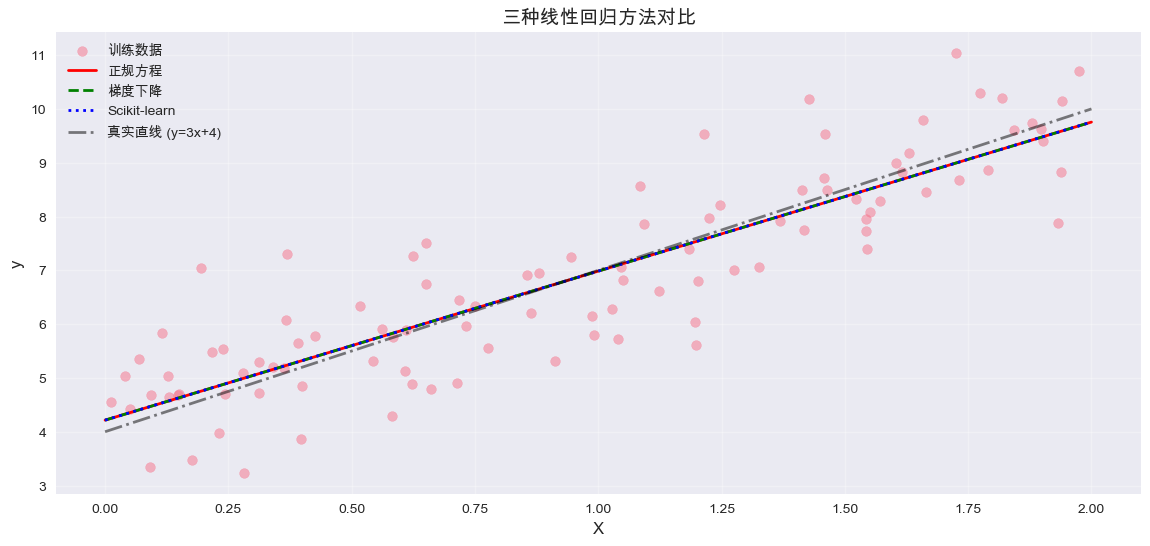

In [8]:
# 生成预测线
X_test = np.linspace(0, 2, 100).reshape(-1, 1)
y_pred_normal = model_normal.predict(X_test)
y_pred_gd = model_gd.predict(X_test)
y_pred_sklearn = model_sklearn.predict(X_test)

# 绘图
plt.figure(figsize=(14, 6))

# 原始数据
plt.scatter(X, y, alpha=0.5, label='训练数据')

# 三种方法的预测线
plt.plot(X_test, y_pred_normal, 'r-', linewidth=2, label='正规方程')
plt.plot(X_test, y_pred_gd, 'g--', linewidth=2, label='梯度下降')
plt.plot(X_test, y_pred_sklearn, 'b:', linewidth=2, label='Scikit-learn')

# 真实直线
y_true = 3 * X_test + 4
plt.plot(X_test, y_true, 'k-.', linewidth=2, alpha=0.5, label='真实直线 (y=3x+4)')

plt.xlabel('X', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('三种线性回归方法对比', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.show()

## 7. 多变量线性回归

现在我们处理有多个特征的情况

In [9]:
# 生成多维数据
from sklearn.datasets import make_regression

X_multi, y_multi = make_regression(
    n_samples=1000,
    n_features=5,
    n_informative=3,
    noise=10,
    random_state=42
)

print(f'数据形状: X={X_multi.shape}, y={y_multi.shape}')
print(f'\n前5个样本:')
print(X_multi[:5])

数据形状: X=(1000, 5), y=(1000,)

前5个样本:
[[-0.73520103  1.79872502 -1.09551939  1.65620825 -0.88075409]
 [-1.6135614  -1.37190114 -0.17294606  1.47117033  1.71170848]
 [ 0.65139125  0.95400176  0.57089051 -0.31526924  1.13556564]
 [-1.35055596 -0.6870141  -0.47579544 -0.07587145 -0.82611199]
 [ 1.55416042  0.34233783 -0.5309709   0.85397598 -0.33513778]]


In [10]:
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X_multi, y_multi, test_size=0.2, random_state=42
)

print(f'训练集: X_train={X_train.shape}, y_train={y_train.shape}')
print(f'测试集: X_test={X_test.shape}, y_test={y_test.shape}')

训练集: X_train=(800, 5), y_train=(800,)
测试集: X_test=(200, 5), y_test=(200,)


In [11]:
# 训练模型
model = LinearRegression()
model.fit(X_train, y_train)

# 预测
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print('模型参数:')
print(f'  权重: {model.coef_}')
print(f'  偏置: {model.intercept_:.4f}')

模型参数:
  权重: [-0.84522495 45.45840788 17.09845068  0.05154124 19.11085973]
  偏置: -0.8671


## 8. 模型评估

### 评估指标

1. **均方误差 (MSE)**
   $$MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2$$

2. **均方根误差 (RMSE)**
   $$RMSE = \sqrt{MSE}$$

3. **平均绝对误差 (MAE)**
   $$MAE = \frac{1}{n}\sum_{i=1}^{n}|y_i - \hat{y}_i|$$

4. **决定系数 (R²)**
   $$R^2 = 1 - \frac{\sum(y_i - \hat{y}_i)^2}{\sum(y_i - \bar{y})^2}$$
   
   R²越接近1，模型越好

In [12]:
# 计算评估指标
def evaluate_model(y_true, y_pred, dataset_name=''):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f'\n{dataset_name}评估结果:')
    print(f'  MSE:  {mse:.4f}')
    print(f'  RMSE: {rmse:.4f}')
    print(f'  MAE:  {mae:.4f}')
    print(f'  R²:   {r2:.4f}')
    
    return {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R2': r2}

train_metrics = evaluate_model(y_train, y_train_pred, '训练集')
test_metrics = evaluate_model(y_test, y_test_pred, '测试集')


训练集评估结果:
  MSE:  109.4766
  RMSE: 10.4631
  MAE:  8.2644
  R²:   0.9632

测试集评估结果:
  MSE:  96.2626
  RMSE: 9.8114
  MAE:  7.9710
  R²:   0.9657


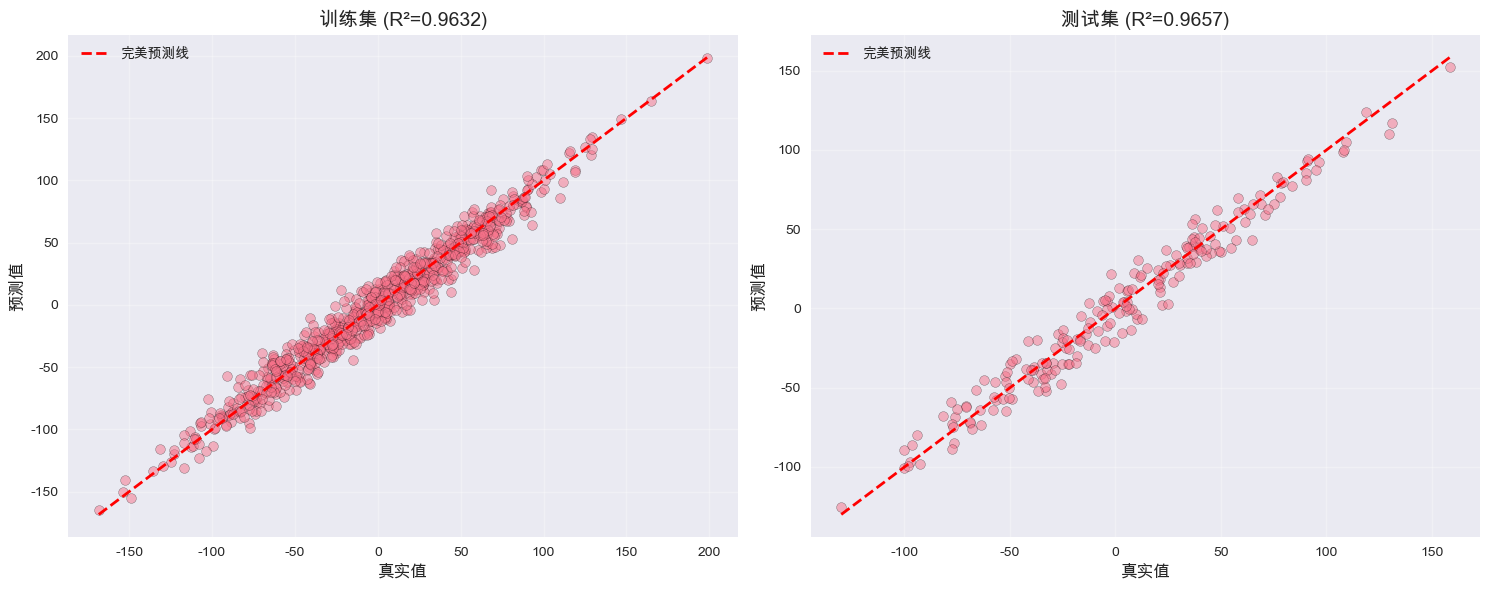

In [13]:
# 可视化预测结果
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 训练集
axes[0].scatter(y_train, y_train_pred, alpha=0.5, edgecolors='k')
axes[0].plot([y_train.min(), y_train.max()], 
             [y_train.min(), y_train.max()], 
             'r--', linewidth=2, label='完美预测线')
axes[0].set_xlabel('真实值', fontsize=12)
axes[0].set_ylabel('预测值', fontsize=12)
axes[0].set_title(f'训练集 (R²={train_metrics["R2"]:.4f})', fontsize=14)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 测试集
axes[1].scatter(y_test, y_test_pred, alpha=0.5, edgecolors='k')
axes[1].plot([y_test.min(), y_test.max()], 
             [y_test.min(), y_test.max()], 
             'r--', linewidth=2, label='完美预测线')
axes[1].set_xlabel('真实值', fontsize=12)
axes[1].set_ylabel('预测值', fontsize=12)
axes[1].set_title(f'测试集 (R²={test_metrics["R2"]:.4f})', fontsize=14)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

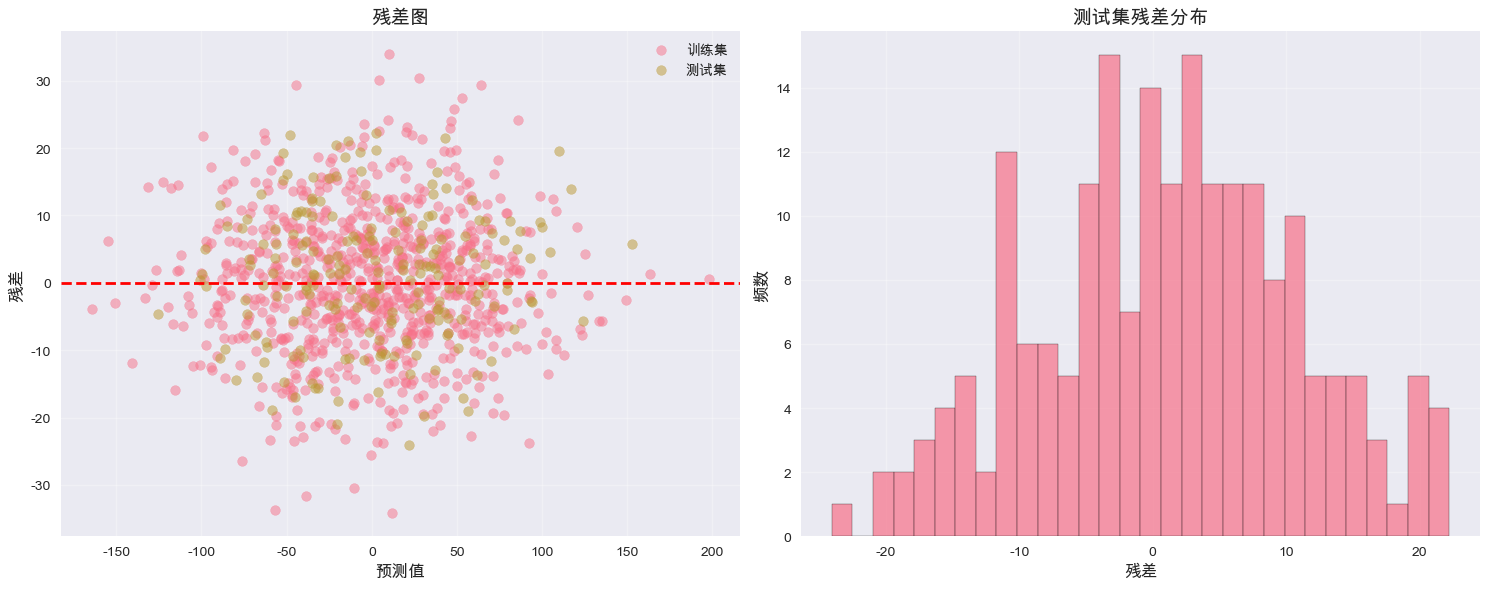

In [14]:
# 残差分析
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 残差分布图
axes[0].scatter(y_train_pred, residuals_train, alpha=0.5, label='训练集')
axes[0].scatter(y_test_pred, residuals_test, alpha=0.5, label='测试集')
axes[0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0].set_xlabel('预测值', fontsize=12)
axes[0].set_ylabel('残差', fontsize=12)
axes[0].set_title('残差图', fontsize=14)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 残差直方图
axes[1].hist(residuals_test, bins=30, edgecolor='black', alpha=0.7)
axes[1].set_xlabel('残差', fontsize=12)
axes[1].set_ylabel('频数', fontsize=12)
axes[1].set_title('测试集残差分布', fontsize=14)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 9. 实战练习

### 练习1：实现批量梯度下降
修改`LinearRegressionGD`类，使其支持批量梯度下降（Mini-batch Gradient Descent）

In [15]:
# TODO: 实现Mini-batch梯度下降
class LinearRegressionMiniBatchGD:
    def __init__(self, learning_rate=0.01, n_iterations=1000, batch_size=32):
        self.lr = learning_rate
        self.n_iterations = n_iterations
        self.batch_size = batch_size
        # 实现你的代码...
        pass
    
    def fit(self, X, y):
        # 实现你的代码...
        pass
    
    def predict(self, X):
        # 实现你的代码...
        pass

### 练习2：特征标准化
在梯度下降之前对特征进行标准化，观察训练速度的变化

In [16]:
# TODO: 使用StandardScaler标准化特征，比较训练速度
from sklearn.preprocessing import StandardScaler

# 你的代码...

### 练习3：使用真实数据集
使用sklearn的`load_diabetes`数据集进行线性回归

In [20]:
# TODO: 加载糖尿病数据集并训练模型
from sklearn.datasets import load_diabetes

# 1. 加载数据集
diabetes = load_diabetes()
X_diabetes = diabetes.data
y_diabetes = diabetes.target

print('=' * 60)
print('糖尿病数据集信息')
print('=' * 60)
print(f'样本数量: {X_diabetes.shape[0]}')
print(f'特征数量: {X_diabetes.shape[1]}')
print(f'\n特征名称:')
for i, name in enumerate(diabetes.feature_names):
    print(f'  {i+1}. {name}')

print(f'\n目标变量描述:')
print(f'  含义: 一年后疾病进展的定量测量')
print(f'  最小值: {y_diabetes.min():.2f}')
print(f'  最大值: {y_diabetes.max():.2f}')
print(f'  平均值: {y_diabetes.mean():.2f}')
print(f'  标准差: {y_diabetes.std():.2f}')

# 转换为DataFrame便于操作
df_diabetes = pd.DataFrame(X_diabetes, columns=diabetes.feature_names)
df_diabetes['target'] = y_diabetes

print(f'\n数据集前5行:')
print(df_diabetes.head())

糖尿病数据集信息
样本数量: 442
特征数量: 10

特征名称:
  1. age
  2. sex
  3. bmi
  4. bp
  5. s1
  6. s2
  7. s3
  8. s4
  9. s5
  10. s6

目标变量描述:
  含义: 一年后疾病进展的定量测量
  最小值: 25.00
  最大值: 346.00
  平均值: 152.13
  标准差: 77.01

数据集前5行:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


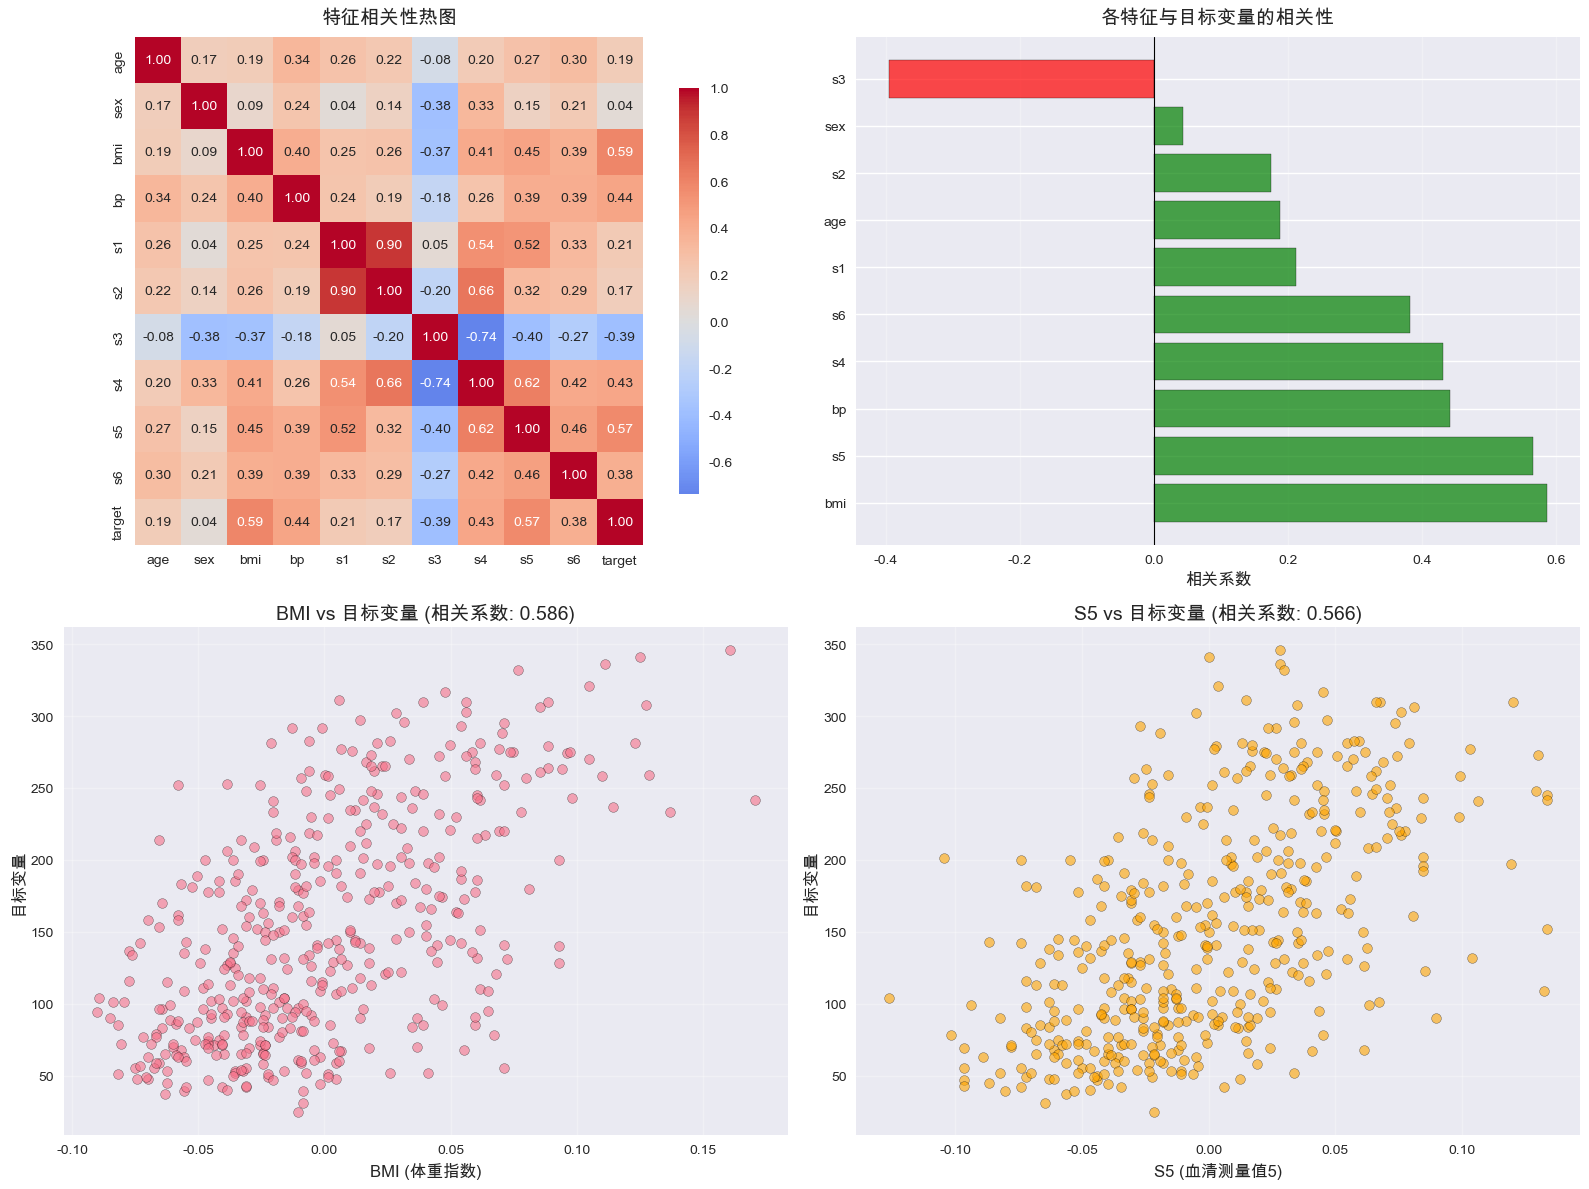


📊 数据可视化分析:
  - 与目标变量相关性最强的3个特征:
    1. bmi: 0.586
    2. s5: 0.566
    3. bp: 0.441
  - 负相关最强的特征: s3 (-0.395)


In [21]:
# 2. 数据可视化
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# (1) 特征相关性热图
ax1 = axes[0, 0]
correlation_matrix = df_diabetes.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, ax=ax1, cbar_kws={'shrink': 0.8})
ax1.set_title('特征相关性热图', fontsize=14, pad=10)

# (2) 目标变量与各特征的相关性条形图
ax2 = axes[0, 1]
target_corr = correlation_matrix['target'].drop('target').sort_values(ascending=False)
colors = ['green' if x > 0 else 'red' for x in target_corr.values]
ax2.barh(range(len(target_corr)), target_corr.values, color=colors, alpha=0.7, edgecolor='black')
ax2.set_yticks(range(len(target_corr)))
ax2.set_yticklabels(target_corr.index)
ax2.set_xlabel('相关系数', fontsize=12)
ax2.set_title('各特征与目标变量的相关性', fontsize=14, pad=10)
ax2.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
ax2.grid(True, alpha=0.3, axis='x')

# (3) 最强相关特征散点图 (bmi)
ax3 = axes[1, 0]
ax3.scatter(df_diabetes['bmi'], df_diabetes['target'], alpha=0.6, edgecolors='k')
ax3.set_xlabel('BMI (体重指数)', fontsize=12)
ax3.set_ylabel('目标变量', fontsize=12)
ax3.set_title(f'BMI vs 目标变量 (相关系数: {correlation_matrix.loc["bmi", "target"]:.3f})', fontsize=14)
ax3.grid(True, alpha=0.3)

# (4) 第二强相关特征散点图 (s5)
ax4 = axes[1, 1]
ax4.scatter(df_diabetes['s5'], df_diabetes['target'], alpha=0.6, edgecolors='k', color='orange')
ax4.set_xlabel('S5 (血清测量值5)', fontsize=12)
ax4.set_ylabel('目标变量', fontsize=12)
ax4.set_title(f'S5 vs 目标变量 (相关系数: {correlation_matrix.loc["s5", "target"]:.3f})', fontsize=14)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print('\n📊 数据可视化分析:')
print(f'  - 与目标变量相关性最强的3个特征:')
for i, (feat, corr) in enumerate(target_corr.head(3).items(), 1):
    print(f'    {i}. {feat}: {corr:.3f}')
print(f'  - 负相关最强的特征: {target_corr.idxmin()} ({target_corr.min():.3f})')

In [22]:
# 3. 划分训练集和测试集
X_train_diabetes, X_test_diabetes, y_train_diabetes, y_test_diabetes = train_test_split(
    X_diabetes, y_diabetes, test_size=0.2, random_state=42
)

print('=' * 60)
print('数据集划分')
print('=' * 60)
print(f'训练集: X_train={X_train_diabetes.shape}, y_train={y_train_diabetes.shape}')
print(f'测试集: X_test={X_test_diabetes.shape}, y_test={y_test_diabetes.shape}')
print(f'\n训练集占比: {len(X_train_diabetes) / len(X_diabetes) * 100:.1f}%')
print(f'测试集占比: {len(X_test_diabetes) / len(X_diabetes) * 100:.1f}%')

数据集划分
训练集: X_train=(353, 10), y_train=(353,)
测试集: X_test=(89, 10), y_test=(89,)

训练集占比: 79.9%
测试集占比: 20.1%


In [23]:
# 4. 训练线性回归模型
print('=' * 60)
print('开始训练模型')
print('=' * 60)

# 创建并训练模型
model_diabetes = LinearRegression()
model_diabetes.fit(X_train_diabetes, y_train_diabetes)

# 在训练集和测试集上进行预测
y_train_pred_diabetes = model_diabetes.predict(X_train_diabetes)
y_test_pred_diabetes = model_diabetes.predict(X_test_diabetes)

print('✓ 模型训练完成!')
print(f'\n模型参数:')
print(f'  截距 (b): {model_diabetes.intercept_:.4f}')
print(f'  系数 (w): {model_diabetes.coef_}')

开始训练模型
✓ 模型训练完成!

模型参数:
  截距 (b): 151.3456
  系数 (w): [  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]


In [24]:
# 5. 模型评估
print('=' * 60)
print('模型评估')
print('=' * 60)

# 训练集评估
train_metrics_diabetes = evaluate_model(y_train_diabetes, y_train_pred_diabetes, '训练集')

# 测试集评估
test_metrics_diabetes = evaluate_model(y_test_diabetes, y_test_pred_diabetes, '测试集')

# 比较训练集和测试集性能
print('\n' + '=' * 60)
print('训练集 vs 测试集性能对比')
print('=' * 60)
print(f'{"指标":<10} {"训练集":>12} {"测试集":>12} {"差异":>12}')
print('-' * 60)
for metric in ['MSE', 'RMSE', 'MAE', 'R2']:
    train_val = train_metrics_diabetes[metric]
    test_val = test_metrics_diabetes[metric]
    diff = test_val - train_val
    print(f'{metric:<10} {train_val:>12.4f} {test_val:>12.4f} {diff:>12.4f}')

# 判断模型状态
if abs(test_metrics_diabetes['R2'] - train_metrics_diabetes['R2']) < 0.05:
    print('\n✓ 模型表现良好,无明显过拟合或欠拟合')
elif test_metrics_diabetes['R2'] < train_metrics_diabetes['R2'] - 0.1:
    print('\n⚠️  可能存在过拟合')
else:
    print('\n✓ 模型泛化能力良好')

模型评估

训练集评估结果:
  MSE:  2868.5497
  RMSE: 53.5588
  MAE:  43.4835
  R²:   0.5279

测试集评估结果:
  MSE:  2900.1936
  RMSE: 53.8534
  MAE:  42.7941
  R²:   0.4526

训练集 vs 测试集性能对比
指标                  训练集          测试集           差异
------------------------------------------------------------
MSE           2868.5497    2900.1936      31.6439
RMSE            53.5588      53.8534       0.2946
MAE             43.4835      42.7941      -0.6894
R2               0.5279       0.4526      -0.0753

✓ 模型泛化能力良好


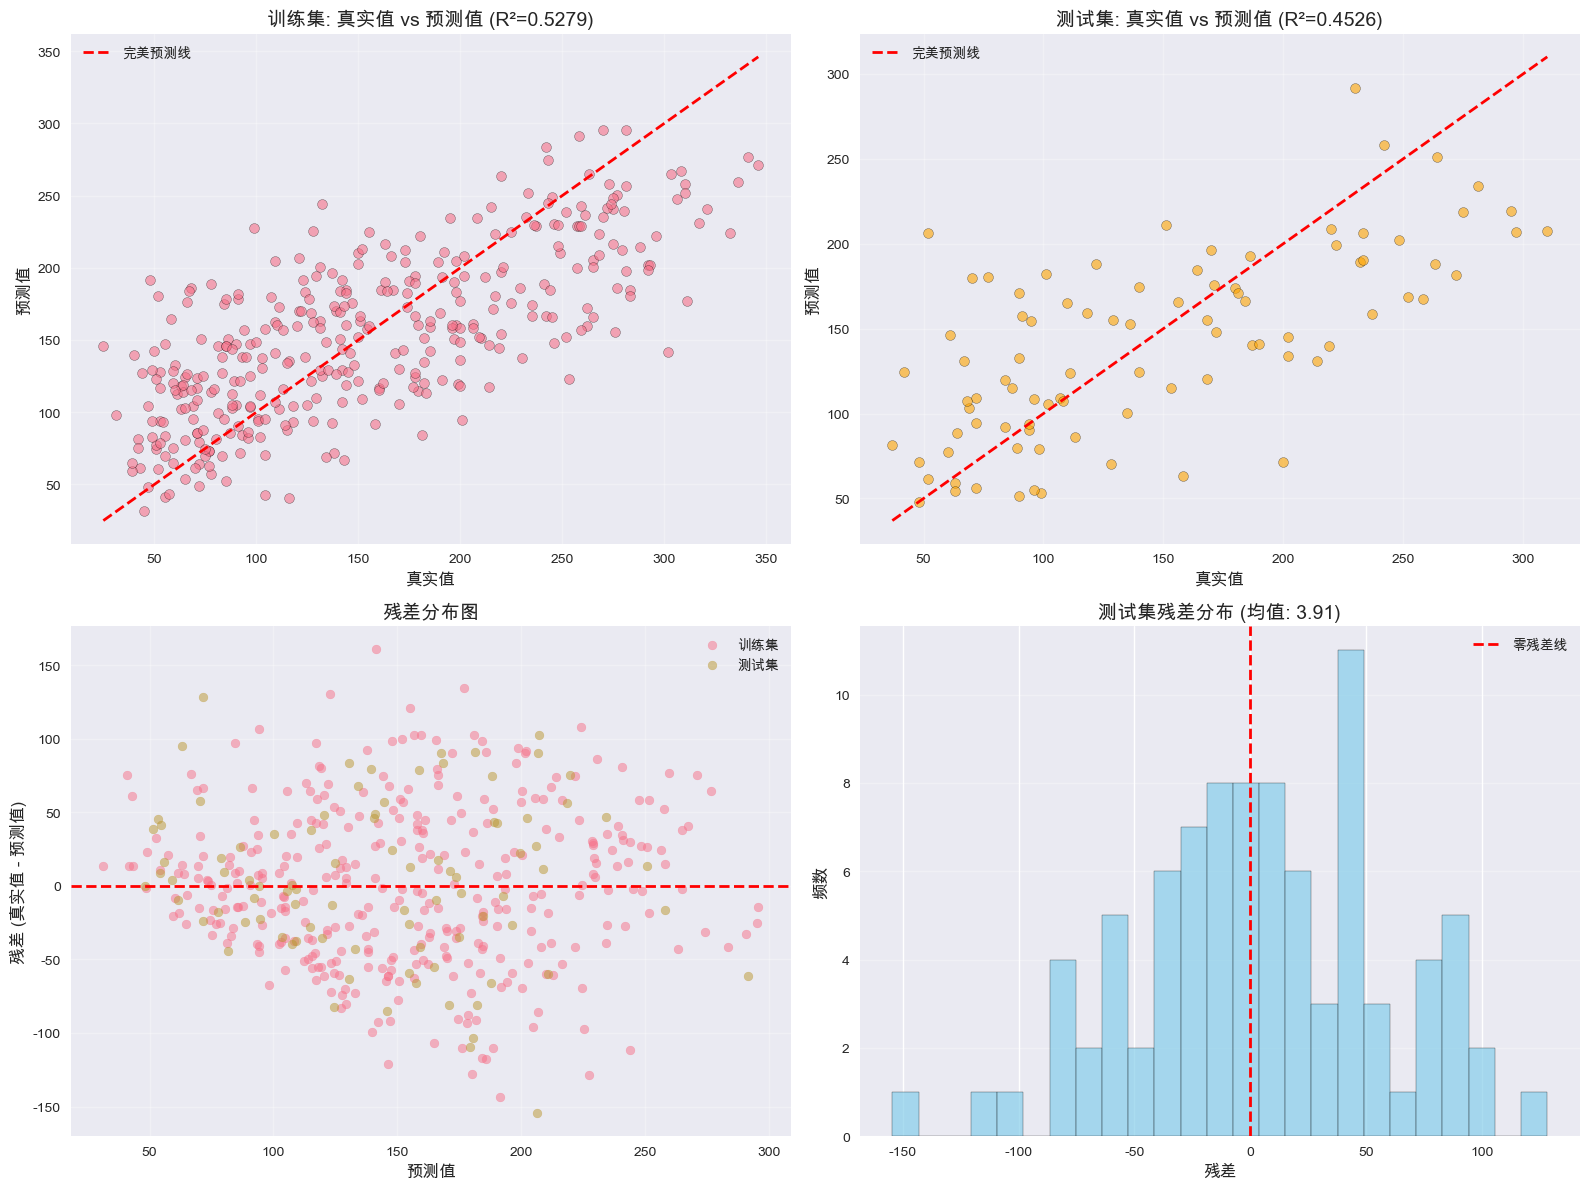

In [25]:
# 6. 可视化预测结果
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# (1) 训练集: 真实值 vs 预测值
ax1 = axes[0, 0]
ax1.scatter(y_train_diabetes, y_train_pred_diabetes, alpha=0.6, edgecolors='k', s=50)
ax1.plot([y_train_diabetes.min(), y_train_diabetes.max()],
         [y_train_diabetes.min(), y_train_diabetes.max()],
         'r--', linewidth=2, label='完美预测线')
ax1.set_xlabel('真实值', fontsize=12)
ax1.set_ylabel('预测值', fontsize=12)
ax1.set_title(f'训练集: 真实值 vs 预测值 (R²={train_metrics_diabetes["R2"]:.4f})', fontsize=14)
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# (2) 测试集: 真实值 vs 预测值
ax2 = axes[0, 1]
ax2.scatter(y_test_diabetes, y_test_pred_diabetes, alpha=0.6, edgecolors='k', s=50, color='orange')
ax2.plot([y_test_diabetes.min(), y_test_diabetes.max()],
         [y_test_diabetes.min(), y_test_diabetes.max()],
         'r--', linewidth=2, label='完美预测线')
ax2.set_xlabel('真实值', fontsize=12)
ax2.set_ylabel('预测值', fontsize=12)
ax2.set_title(f'测试集: 真实值 vs 预测值 (R²={test_metrics_diabetes["R2"]:.4f})', fontsize=14)
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

# (3) 残差图
residuals_train_diabetes = y_train_diabetes - y_train_pred_diabetes
residuals_test_diabetes = y_test_diabetes - y_test_pred_diabetes

ax3 = axes[1, 0]
ax3.scatter(y_train_pred_diabetes, residuals_train_diabetes, alpha=0.5, label='训练集', s=40)
ax3.scatter(y_test_pred_diabetes, residuals_test_diabetes, alpha=0.5, label='测试集', s=40)
ax3.axhline(y=0, color='r', linestyle='--', linewidth=2)
ax3.set_xlabel('预测值', fontsize=12)
ax3.set_ylabel('残差 (真实值 - 预测值)', fontsize=12)
ax3.set_title('残差分布图', fontsize=14)
ax3.legend(fontsize=10)
ax3.grid(True, alpha=0.3)

# (4) 残差直方图
ax4 = axes[1, 1]
ax4.hist(residuals_test_diabetes, bins=25, edgecolor='black', alpha=0.7, color='skyblue')
ax4.axvline(x=0, color='r', linestyle='--', linewidth=2, label='零残差线')
ax4.set_xlabel('残差', fontsize=12)
ax4.set_ylabel('频数', fontsize=12)
ax4.set_title(f'测试集残差分布 (均值: {residuals_test_diabetes.mean():.2f})', fontsize=14)
ax4.legend(fontsize=10)
ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

特征重要性分析

特征系数 (按重要性排序):
特征名称          系数        绝对值
  s1 -931.488846 931.488846
  s5  736.198859 736.198859
 bmi  542.428759 542.428759
  s2  518.062277 518.062277
  bp  347.703844 347.703844
  s4  275.317902 275.317902
 sex -241.964362 241.964362
  s3  163.419983 163.419983
  s6   48.670657  48.670657
 age   37.904021  37.904021


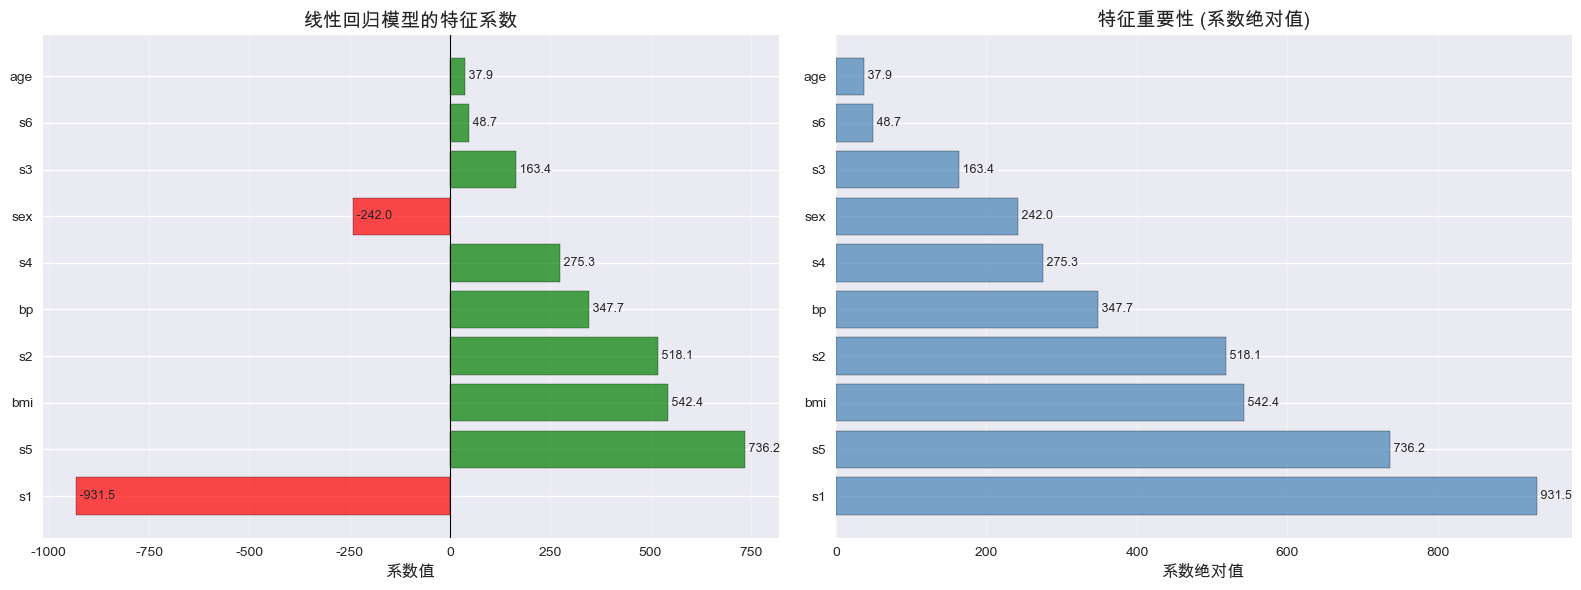


特征分析总结
最重要的特征 (系数绝对值最大):
  1. s1: 系数=-931.49 (负向影响)
  2. s5: 系数=736.20 (正向影响)
  3. bmi: 系数=542.43 (正向影响)

解释:
  - 正系数: 该特征增加时,疾病进展程度增加
  - 负系数: 该特征增加时,疾病进展程度减少
  - 系数绝对值越大,特征对预测的影响越大


In [26]:
# 7. 特征重要性分析
print('=' * 60)
print('特征重要性分析')
print('=' * 60)

# 创建特征重要性DataFrame
feature_importance = pd.DataFrame({
    '特征名称': diabetes.feature_names,
    '系数': model_diabetes.coef_,
    '绝对值': np.abs(model_diabetes.coef_)
}).sort_values('绝对值', ascending=False)

print('\n特征系数 (按重要性排序):')
print(feature_importance.to_string(index=False))

# 可视化特征重要性
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# (1) 特征系数条形图
ax1 = axes[0]
colors = ['green' if x > 0 else 'red' for x in feature_importance['系数']]
bars = ax1.barh(range(len(feature_importance)), feature_importance['系数'],
                color=colors, alpha=0.7, edgecolor='black')
ax1.set_yticks(range(len(feature_importance)))
ax1.set_yticklabels(feature_importance['特征名称'])
ax1.set_xlabel('系数值', fontsize=12)
ax1.set_title('线性回归模型的特征系数', fontsize=14)
ax1.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
ax1.grid(True, alpha=0.3, axis='x')

# 添加数值标签
for i, (idx, row) in enumerate(feature_importance.iterrows()):
    ax1.text(row['系数'], i, f' {row["系数"]:.1f}',
            va='center', fontsize=9)

# (2) 特征重要性(绝对值)条形图
ax2 = axes[1]
ax2.barh(range(len(feature_importance)), feature_importance['绝对值'],
         alpha=0.7, edgecolor='black', color='steelblue')
ax2.set_yticks(range(len(feature_importance)))
ax2.set_yticklabels(feature_importance['特征名称'])
ax2.set_xlabel('系数绝对值', fontsize=12)
ax2.set_title('特征重要性 (系数绝对值)', fontsize=14)
ax2.grid(True, alpha=0.3, axis='x')

# 添加数值标签
for i, (idx, row) in enumerate(feature_importance.iterrows()):
    ax2.text(row['绝对值'], i, f' {row["绝对值"]:.1f}',
            va='center', fontsize=9)

plt.tight_layout()
plt.show()

# 总结
print('\n' + '=' * 60)
print('特征分析总结')
print('=' * 60)
print(f'最重要的特征 (系数绝对值最大):')
for i, (idx, row) in enumerate(feature_importance.head(3).iterrows(), 1):
    impact = '正向影响' if row['系数'] > 0 else '负向影响'
    print(f'  {i}. {row["特征名称"]}: 系数={row["系数"]:.2f} ({impact})')

print(f'\n解释:')
print(f'  - 正系数: 该特征增加时,疾病进展程度增加')
print(f'  - 负系数: 该特征增加时,疾病进展程度减少')
print(f'  - 系数绝对值越大,特征对预测的影响越大')

特征重要性分析

特征系数 (按重要性排序):
特征名称          系数        绝对值
  s1 -931.488846 931.488846
  s5  736.198859 736.198859
 bmi  542.428759 542.428759
  s2  518.062277 518.062277
  bp  347.703844 347.703844
  s4  275.317902 275.317902
 sex -241.964362 241.964362
  s3  163.419983 163.419983
  s6   48.670657  48.670657
 age   37.904021  37.904021


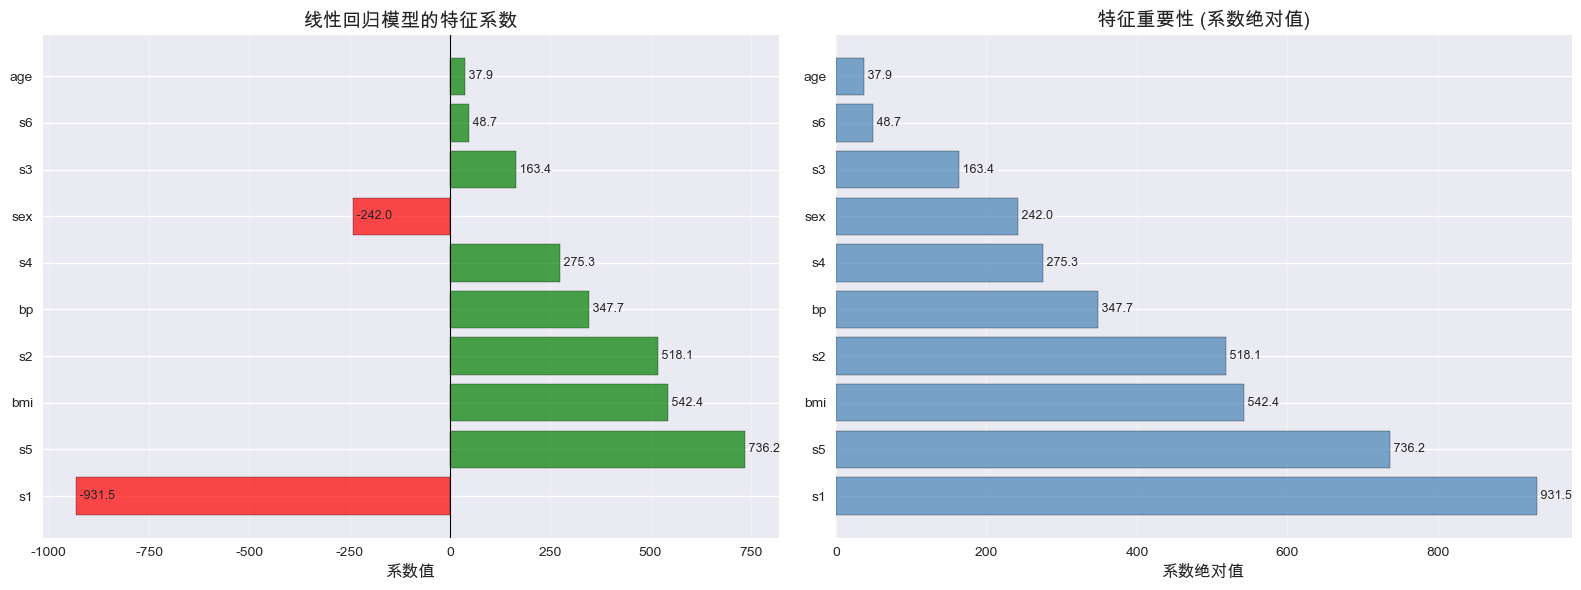


特征分析总结
最重要的特征 (系数绝对值最大):
  1. s1: 系数=-931.49 (负向影响)
  2. s5: 系数=736.20 (正向影响)
  3. bmi: 系数=542.43 (正向影响)

解释:
  - 正系数: 该特征增加时,疾病进展程度增加
  - 负系数: 该特征增加时,疾病进展程度减少
  - 系数绝对值越大,特征对预测的影响越大


In [27]:
# 7. 特征重要性分析
print('=' * 60)
print('特征重要性分析')
print('=' * 60)

# 创建特征重要性DataFrame
feature_importance = pd.DataFrame({
    '特征名称': diabetes.feature_names,
    '系数': model_diabetes.coef_,
    '绝对值': np.abs(model_diabetes.coef_)
}).sort_values('绝对值', ascending=False)

print('\n特征系数 (按重要性排序):')
print(feature_importance.to_string(index=False))

# 可视化特征重要性
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# (1) 特征系数条形图
ax1 = axes[0]
colors = ['green' if x > 0 else 'red' for x in feature_importance['系数']]
bars = ax1.barh(range(len(feature_importance)), feature_importance['系数'], 
                color=colors, alpha=0.7, edgecolor='black')
ax1.set_yticks(range(len(feature_importance)))
ax1.set_yticklabels(feature_importance['特征名称'])
ax1.set_xlabel('系数值', fontsize=12)
ax1.set_title('线性回归模型的特征系数', fontsize=14)
ax1.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
ax1.grid(True, alpha=0.3, axis='x')

# 添加数值标签
for i, (idx, row) in enumerate(feature_importance.iterrows()):
    ax1.text(row['系数'], i, f' {row["系数"]:.1f}', 
            va='center', fontsize=9)

# (2) 特征重要性(绝对值)条形图
ax2 = axes[1]
ax2.barh(range(len(feature_importance)), feature_importance['绝对值'], 
         alpha=0.7, edgecolor='black', color='steelblue')
ax2.set_yticks(range(len(feature_importance)))
ax2.set_yticklabels(feature_importance['特征名称'])
ax2.set_xlabel('系数绝对值', fontsize=12)
ax2.set_title('特征重要性 (系数绝对值)', fontsize=14)
ax2.grid(True, alpha=0.3, axis='x')

# 添加数值标签
for i, (idx, row) in enumerate(feature_importance.iterrows()):
    ax2.text(row['绝对值'], i, f' {row["绝对值"]:.1f}', 
            va='center', fontsize=9)

plt.tight_layout()
plt.show()

# 总结
print('\n' + '=' * 60)
print('特征分析总结')
print('=' * 60)
print(f'最重要的特征 (系数绝对值最大):')
for i, (idx, row) in enumerate(feature_importance.head(3).iterrows(), 1):
    impact = '正向影响' if row['系数'] > 0 else '负向影响'
    print(f'  {i}. {row["特征名称"]}: 系数={row["系数"]:.2f} ({impact})')

print(f'\n解释:')
print(f'  - 正系数: 该特征增加时,疾病进展程度增加')
print(f'  - 负系数: 该特征增加时,疾病进展程度减少')
print(f'  - 系数绝对值越大,特征对预测的影响越大')

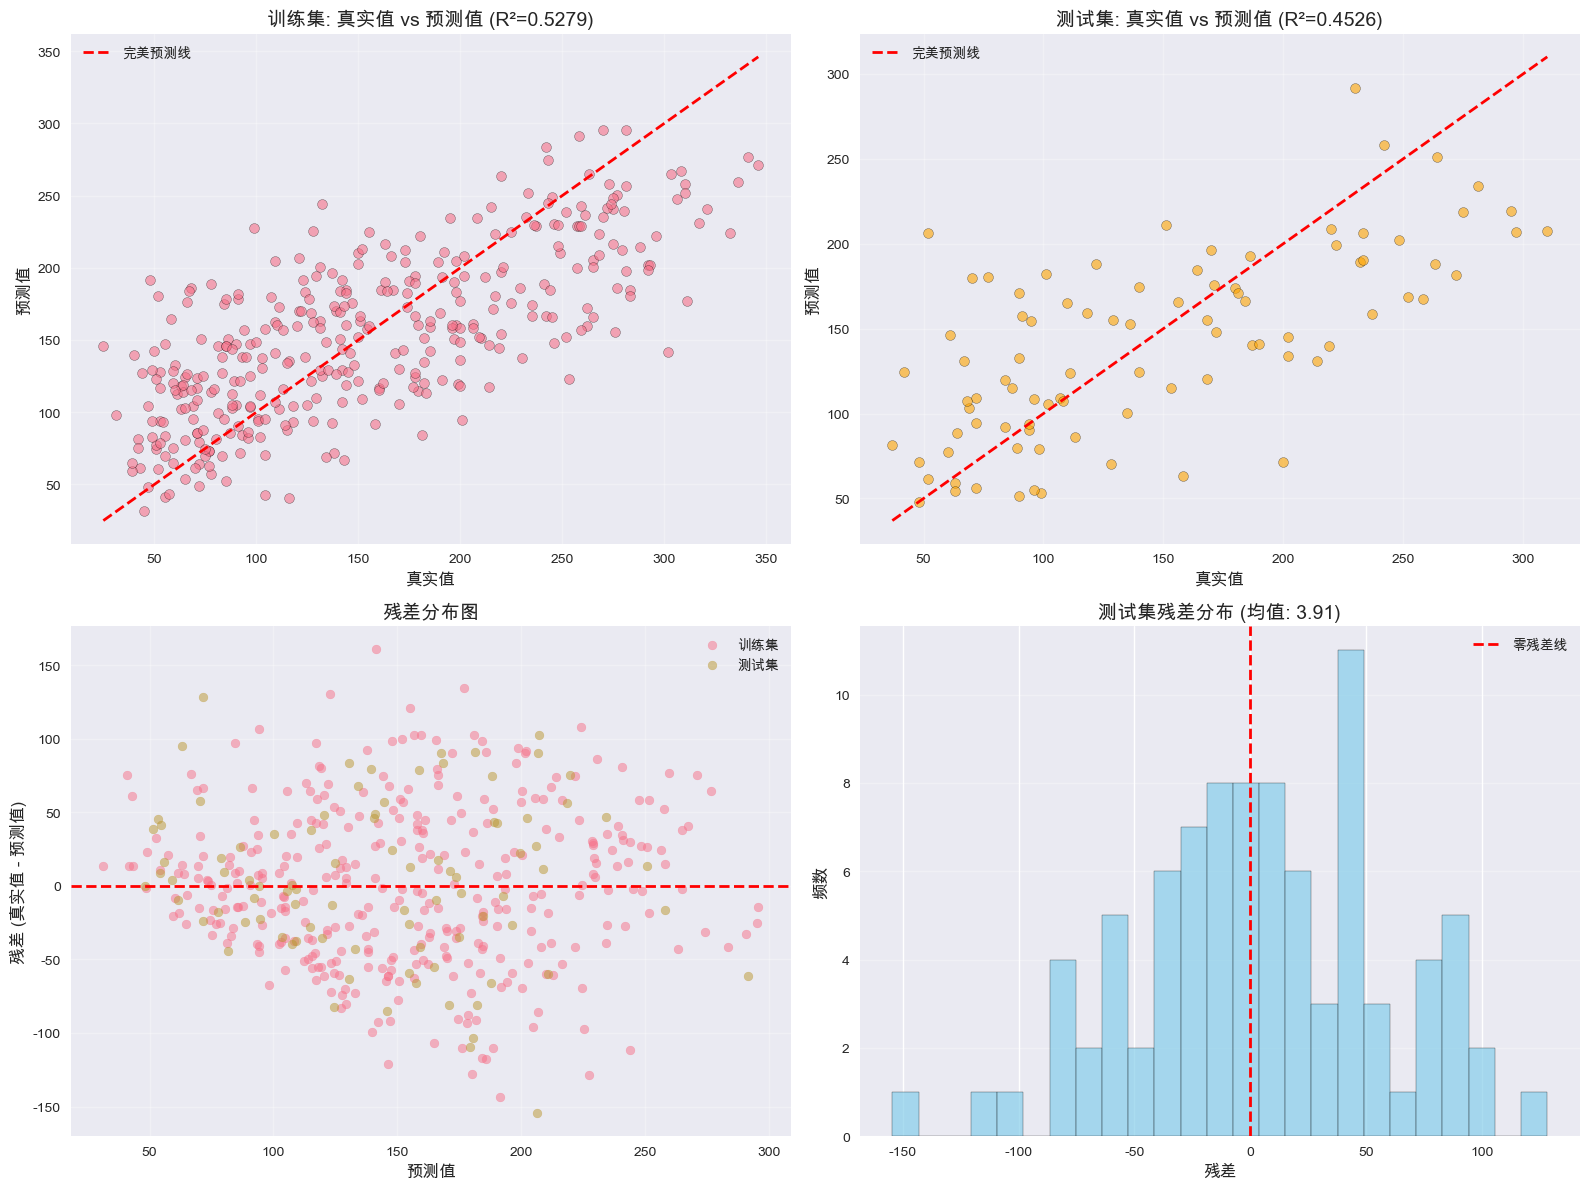

In [28]:
# 6. 可视化预测结果
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# (1) 训练集: 真实值 vs 预测值
ax1 = axes[0, 0]
ax1.scatter(y_train_diabetes, y_train_pred_diabetes, alpha=0.6, edgecolors='k', s=50)
ax1.plot([y_train_diabetes.min(), y_train_diabetes.max()], 
         [y_train_diabetes.min(), y_train_diabetes.max()], 
         'r--', linewidth=2, label='完美预测线')
ax1.set_xlabel('真实值', fontsize=12)
ax1.set_ylabel('预测值', fontsize=12)
ax1.set_title(f'训练集: 真实值 vs 预测值 (R²={train_metrics_diabetes["R2"]:.4f})', fontsize=14)
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# (2) 测试集: 真实值 vs 预测值
ax2 = axes[0, 1]
ax2.scatter(y_test_diabetes, y_test_pred_diabetes, alpha=0.6, edgecolors='k', s=50, color='orange')
ax2.plot([y_test_diabetes.min(), y_test_diabetes.max()], 
         [y_test_diabetes.min(), y_test_diabetes.max()], 
         'r--', linewidth=2, label='完美预测线')
ax2.set_xlabel('真实值', fontsize=12)
ax2.set_ylabel('预测值', fontsize=12)
ax2.set_title(f'测试集: 真实值 vs 预测值 (R²={test_metrics_diabetes["R2"]:.4f})', fontsize=14)
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

# (3) 残差图
residuals_train_diabetes = y_train_diabetes - y_train_pred_diabetes
residuals_test_diabetes = y_test_diabetes - y_test_pred_diabetes

ax3 = axes[1, 0]
ax3.scatter(y_train_pred_diabetes, residuals_train_diabetes, alpha=0.5, label='训练集', s=40)
ax3.scatter(y_test_pred_diabetes, residuals_test_diabetes, alpha=0.5, label='测试集', s=40)
ax3.axhline(y=0, color='r', linestyle='--', linewidth=2)
ax3.set_xlabel('预测值', fontsize=12)
ax3.set_ylabel('残差 (真实值 - 预测值)', fontsize=12)
ax3.set_title('残差分布图', fontsize=14)
ax3.legend(fontsize=10)
ax3.grid(True, alpha=0.3)

# (4) 残差直方图
ax4 = axes[1, 1]
ax4.hist(residuals_test_diabetes, bins=25, edgecolor='black', alpha=0.7, color='skyblue')
ax4.axvline(x=0, color='r', linestyle='--', linewidth=2, label='零残差线')
ax4.set_xlabel('残差', fontsize=12)
ax4.set_ylabel('频数', fontsize=12)
ax4.set_title(f'测试集残差分布 (均值: {residuals_test_diabetes.mean():.2f})', fontsize=14)
ax4.legend(fontsize=10)
ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

In [29]:
# 5. 模型评估
print('=' * 60)
print('模型评估')
print('=' * 60)

# 训练集评估
train_metrics_diabetes = evaluate_model(y_train_diabetes, y_train_pred_diabetes, '训练集')

# 测试集评估
test_metrics_diabetes = evaluate_model(y_test_diabetes, y_test_pred_diabetes, '测试集')

# 比较训练集和测试集性能
print('\n' + '=' * 60)
print('训练集 vs 测试集性能对比')
print('=' * 60)
print(f'{"指标":<10} {"训练集":>12} {"测试集":>12} {"差异":>12}')
print('-' * 60)
for metric in ['MSE', 'RMSE', 'MAE', 'R2']:
    train_val = train_metrics_diabetes[metric]
    test_val = test_metrics_diabetes[metric]
    diff = test_val - train_val
    print(f'{metric:<10} {train_val:>12.4f} {test_val:>12.4f} {diff:>12.4f}')

# 判断模型状态
if abs(test_metrics_diabetes['R2'] - train_metrics_diabetes['R2']) < 0.05:
    print('\n✓ 模型表现良好,无明显过拟合或欠拟合')
elif test_metrics_diabetes['R2'] < train_metrics_diabetes['R2'] - 0.1:
    print('\n⚠️  可能存在过拟合')
else:
    print('\n✓ 模型泛化能力良好')

模型评估

训练集评估结果:
  MSE:  2868.5497
  RMSE: 53.5588
  MAE:  43.4835
  R²:   0.5279

测试集评估结果:
  MSE:  2900.1936
  RMSE: 53.8534
  MAE:  42.7941
  R²:   0.4526

训练集 vs 测试集性能对比
指标                  训练集          测试集           差异
------------------------------------------------------------
MSE           2868.5497    2900.1936      31.6439
RMSE            53.5588      53.8534       0.2946
MAE             43.4835      42.7941      -0.6894
R2               0.5279       0.4526      -0.0753

✓ 模型泛化能力良好


In [30]:
# 4. 训练线性回归模型
print('=' * 60)
print('开始训练模型')
print('=' * 60)

# 创建并训练模型
model_diabetes = LinearRegression()
model_diabetes.fit(X_train_diabetes, y_train_diabetes)

# 在训练集和测试集上进行预测
y_train_pred_diabetes = model_diabetes.predict(X_train_diabetes)
y_test_pred_diabetes = model_diabetes.predict(X_test_diabetes)

print('✓ 模型训练完成!')
print(f'\n模型参数:')
print(f'  截距 (b): {model_diabetes.intercept_:.4f}')
print(f'  系数 (w): {model_diabetes.coef_}')

开始训练模型
✓ 模型训练完成!

模型参数:
  截距 (b): 151.3456
  系数 (w): [  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]


In [31]:
# 3. 划分训练集和测试集
X_train_diabetes, X_test_diabetes, y_train_diabetes, y_test_diabetes = train_test_split(
    X_diabetes, y_diabetes, test_size=0.2, random_state=42
)

print('=' * 60)
print('数据集划分')
print('=' * 60)
print(f'训练集: X_train={X_train_diabetes.shape}, y_train={y_train_diabetes.shape}')
print(f'测试集: X_test={X_test_diabetes.shape}, y_test={y_test_diabetes.shape}')
print(f'\n训练集占比: {len(X_train_diabetes) / len(X_diabetes) * 100:.1f}%')
print(f'测试集占比: {len(X_test_diabetes) / len(X_diabetes) * 100:.1f}%')

数据集划分
训练集: X_train=(353, 10), y_train=(353,)
测试集: X_test=(89, 10), y_test=(89,)

训练集占比: 79.9%
测试集占比: 20.1%


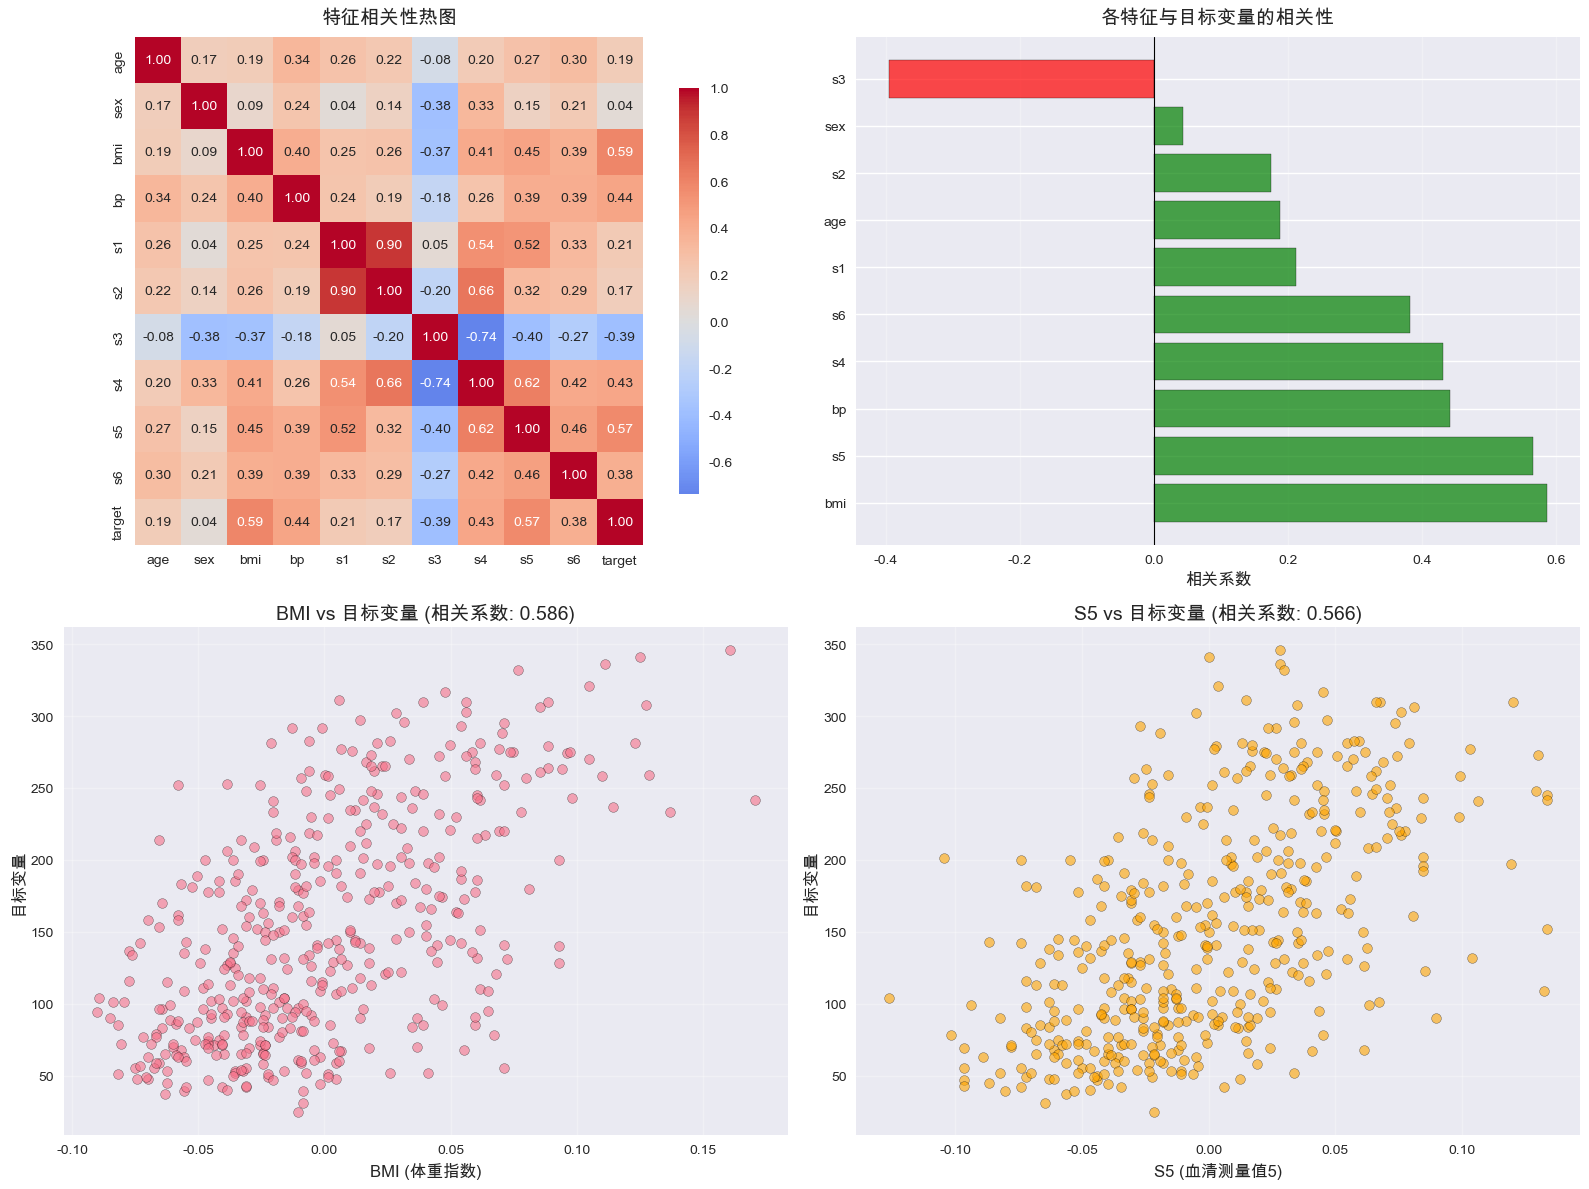


📊 数据可视化分析:
  - 与目标变量相关性最强的3个特征:
    1. bmi: 0.586
    2. s5: 0.566
    3. bp: 0.441
  - 负相关最强的特征: s3 (-0.395)


In [32]:
# 2. 数据可视化
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# (1) 特征相关性热图
ax1 = axes[0, 0]
correlation_matrix = df_diabetes.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, ax=ax1, cbar_kws={'shrink': 0.8})
ax1.set_title('特征相关性热图', fontsize=14, pad=10)

# (2) 目标变量与各特征的相关性条形图
ax2 = axes[0, 1]
target_corr = correlation_matrix['target'].drop('target').sort_values(ascending=False)
colors = ['green' if x > 0 else 'red' for x in target_corr.values]
ax2.barh(range(len(target_corr)), target_corr.values, color=colors, alpha=0.7, edgecolor='black')
ax2.set_yticks(range(len(target_corr)))
ax2.set_yticklabels(target_corr.index)
ax2.set_xlabel('相关系数', fontsize=12)
ax2.set_title('各特征与目标变量的相关性', fontsize=14, pad=10)
ax2.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
ax2.grid(True, alpha=0.3, axis='x')

# (3) 最强相关特征散点图 (bmi)
ax3 = axes[1, 0]
ax3.scatter(df_diabetes['bmi'], df_diabetes['target'], alpha=0.6, edgecolors='k')
ax3.set_xlabel('BMI (体重指数)', fontsize=12)
ax3.set_ylabel('目标变量', fontsize=12)
ax3.set_title(f'BMI vs 目标变量 (相关系数: {correlation_matrix.loc["bmi", "target"]:.3f})', fontsize=14)
ax3.grid(True, alpha=0.3)

# (4) 第二强相关特征散点图 (s5)
ax4 = axes[1, 1]
ax4.scatter(df_diabetes['s5'], df_diabetes['target'], alpha=0.6, edgecolors='k', color='orange')
ax4.set_xlabel('S5 (血清测量值5)', fontsize=12)
ax4.set_ylabel('目标变量', fontsize=12)
ax4.set_title(f'S5 vs 目标变量 (相关系数: {correlation_matrix.loc["s5", "target"]:.3f})', fontsize=14)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print('\n📊 数据可视化分析:')
print(f'  - 与目标变量相关性最强的3个特征:')
for i, (feat, corr) in enumerate(target_corr.head(3).items(), 1):
    print(f'    {i}. {feat}: {corr:.3f}')
print(f'  - 负相关最强的特征: {target_corr.idxmin()} ({target_corr.min():.3f})')

## 10. 总结

### 学到的知识点
- ✅ 线性回归的数学原理
- ✅ 正规方程 vs 梯度下降
- ✅ 从零实现线性回归
- ✅ 使用Scikit-learn快速实现
- ✅ 模型评估指标（MSE、RMSE、MAE、R²）
- ✅ 残差分析

### 优缺点

**优点：**
- 简单、易于理解
- 训练速度快
- 可解释性强

**缺点：**
- 只能处理线性关系
- 对异常值敏感
- 特征之间有多重共线性时表现不佳

### 何时使用线性回归？
- 数据呈现线性关系
- 需要快速baseline模型
- 需要模型可解释性
- 特征维度不是特别高

---

### 下一步
在下一个notebook中，我们将学习：
- 多项式回归
- 正则化（Ridge、Lasso）
- 如何处理非线性关系